In [98]:
%matplotlib notebook
import pandas
import matplotlib
from datetime import datetime

This notebook contains a bunch of commands from [Michael Hansen's tutorial](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links). It's useful as a Pandas Cheat Sheet.

# Basics

In [4]:
data = pandas.read_csv("data/weather_year.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
EDT                          366 non-null object
Max TemperatureF             366 non-null int64
Mean TemperatureF            366 non-null int64
Min TemperatureF             366 non-null int64
Max Dew PointF               366 non-null int64
MeanDew PointF               366 non-null int64
Min DewpointF                366 non-null int64
Max Humidity                 366 non-null int64
Mean Humidity                366 non-null int64
Min Humidity                 365 non-null float64
Max Sea Level PressureIn     365 non-null float64
Mean Sea Level PressureIn    365 non-null float64
Min Sea Level PressureIn     365 non-null float64
Max VisibilityMiles          365 non-null float64
Mean VisibilityMiles         365 non-null float64
Min VisibilityMiles          365 non-null float64
Max Wind SpeedMPH            365 non-null float64
Mean Wind SpeedMPH           365 non-null float64
Max Gust Spe

In [12]:
data.columns = ['date', 'max_temp', "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

In [23]:
data.mean_temp.std()

18.436505996251068

<IPython.core.display.Javascript object>


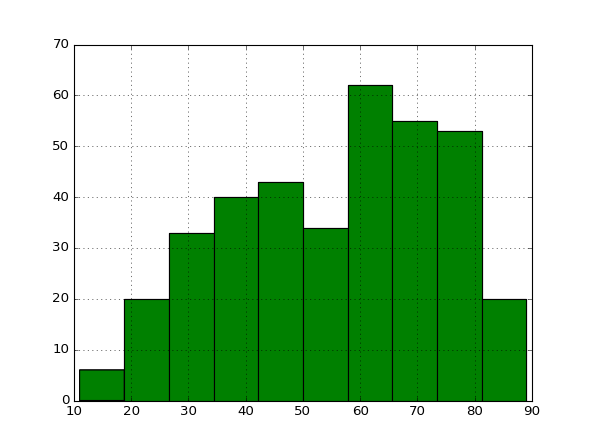

In [21]:
data.mean_temp.hist()

In [24]:
data.std()

max_temp           20.361247
mean_temp          18.436506
min_temp           17.301141
max_dew            16.397178
mean_dew           16.829996
min_dew            17.479449
max_humidity        9.108438
mean_humidity       9.945591
min_humidity       15.380432
max_pressure        0.172198
mean_pressure       0.174268
min_pressure        0.182709
max_visibilty       0.073922
mean_visibility     1.876802
min_visibility      3.791014
max_wind            5.570521
mean_wind           3.203711
min_wind            8.140508
cloud_cover         2.709171
wind_dir           94.166634
dtype: float64

# Bulk Operations with ``apply()``


 Methods like ``sum()`` and ``std()`` work on entire columns, we can run our own function in a column or row using ``apply()``:


In [26]:
data.date.head()

0    2012-3-10
1    2012-3-11
2    2012-3-12
3    2012-3-13
4    2012-3-14
Name: date, dtype: object

In [28]:
first_date= data.date.values[0]
first_date

'2012-3-10'

In [31]:
datetime.strptime(first_date,'%Y-%m-%d')

datetime.datetime(2012, 3, 10, 0, 0)

This converts one value, to convert an entire column, we use ``apply()`` in the following way:


In [32]:
data.date = data.date.apply(lambda d: datetime.strptime(d,'%Y-%m-%d'))
data.date.head()

0   2012-03-10
1   2012-03-11
2   2012-03-12
3   2012-03-13
4   2012-03-14
Name: date, dtype: datetime64[ns]

In [33]:
data.index = data.date

Why is this useful? BC now we can quickly look up a row by its date with the ``ix[]`` property:

In [35]:
data.ix[datetime(2012,8,19)]

date               2012-08-19 00:00:00
max_temp                            82
mean_temp                           67
min_temp                            51
max_dew                             56
mean_dew                            50
min_dew                             42
max_humidity                        96
mean_humidity                       62
min_humidity                        28
max_pressure                     29.95
mean_pressure                    29.92
min_pressure                     29.89
max_visibilty                       10
mean_visibility                     10
min_visibility                      10
max_wind                            14
mean_wind                            3
min_wind                            21
precipitation                        0
cloud_cover                          1
events                             NaN
wind_dir                             1
Name: 2012-08-19 00:00:00, dtype: object

In [36]:
data = data.drop(['date'],axis=1)

# Handling Missing values

In [42]:
empty = data.apply(lambda col: pandas.isnull(col))

this gives us a dataframe ``empty`` with boolean values fo  all 22 columns. Look:

In [44]:
empty.events.head(10)

date
2012-03-10     True
2012-03-11    False
2012-03-12    False
2012-03-13     True
2012-03-14     True
2012-03-15    False
2012-03-16     True
2012-03-17    False
2012-03-18    False
2012-03-19     True
Freq: D, Name: events, dtype: bool

In [46]:
#now we drop:
data.dropna(subset=['events']).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2012-03-11 to 2013-03-06
Data columns (total 22 columns):
max_temp           162 non-null int64
mean_temp          162 non-null int64
min_temp           162 non-null int64
max_dew            162 non-null int64
mean_dew           162 non-null int64
min_dew            162 non-null int64
max_humidity       162 non-null int64
mean_humidity      162 non-null int64
min_humidity       162 non-null float64
max_pressure       162 non-null float64
mean_pressure      162 non-null float64
min_pressure       162 non-null float64
max_visibilty      162 non-null float64
mean_visibility    162 non-null float64
min_visibility     162 non-null float64
max_wind           162 non-null float64
mean_wind          162 non-null float64
min_wind           162 non-null float64
precipitation      162 non-null object
cloud_cover        162 non-null float64
events             162 non-null object
wind_dir           162 non-null float64
dtypes: float6

In [48]:
#fill rows with missing values with emtpy strings
data.events = data.events.fillna("")
data.events.head(10)

date
2012-03-10                     
2012-03-11                 Rain
2012-03-12                 Rain
2012-03-13                     
2012-03-14                     
2012-03-15    Rain-Thunderstorm
2012-03-16                     
2012-03-17     Fog-Thunderstorm
2012-03-18                 Rain
2012-03-19                     
Freq: D, Name: events, dtype: object

# Accesing individual rows 

In [50]:
data.iloc[15]

max_temp              69
mean_temp             61
min_temp              52
max_dew               55
mean_dew              53
min_dew               51
max_humidity         100
mean_humidity         82
min_humidity          63
max_pressure       30.05
mean_pressure      29.96
min_pressure       29.88
max_visibilty         10
mean_visibility        8
min_visibility         4
max_wind              14
mean_wind              5
min_wind              20
precipitation          0
cloud_cover            6
events                  
wind_dir             353
Name: 2012-03-25 00:00:00, dtype: object

In [51]:
# iterrow makes you iterate over rows. idx refers to the fact that iterrows returns both the index and the row:
num_rain = 0
for idx, row in data.iterrows():
    if "Rain" in row["events"]:
        num_rain += 1

"Days with rain: {0}".format(num_rain)

'Days with rain: 121'

# Filtering

In [54]:
freezing_days = data[(data.max_temp <= 32) & (data.min_temp >= 20)]
freezing_days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2012-11-24 to 2013-03-06
Data columns (total 22 columns):
max_temp           7 non-null int64
mean_temp          7 non-null int64
min_temp           7 non-null int64
max_dew            7 non-null int64
mean_dew           7 non-null int64
min_dew            7 non-null int64
max_humidity       7 non-null int64
mean_humidity      7 non-null int64
min_humidity       7 non-null float64
max_pressure       7 non-null float64
mean_pressure      7 non-null float64
min_pressure       7 non-null float64
max_visibilty      7 non-null float64
mean_visibility    7 non-null float64
min_visibility     7 non-null float64
max_wind           7 non-null float64
mean_wind          7 non-null float64
min_wind           7 non-null float64
precipitation      7 non-null object
cloud_cover        7 non-null float64
events             7 non-null object
wind_dir           7 non-null float64
dtypes: float64(12), int64(8), object(2)
memory usage: 1.3+ 

In [61]:
# or create a boolean operator with only one row (notice that since our data uses a timeseries for an index, 
#this will be a timeseries object that returns true only if max_temp and min_temp are in the desired range)
temp_max = (data.max_temp <= 32) 
type(temp_max)

pandas.core.series.Series

In [63]:
data[temp_max].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2012-11-24 to 2013-03-06
Data columns (total 22 columns):
max_temp           21 non-null int64
mean_temp          21 non-null int64
min_temp           21 non-null int64
max_dew            21 non-null int64
mean_dew           21 non-null int64
min_dew            21 non-null int64
max_humidity       21 non-null int64
mean_humidity      21 non-null int64
min_humidity       21 non-null float64
max_pressure       21 non-null float64
mean_pressure      21 non-null float64
min_pressure       21 non-null float64
max_visibilty      21 non-null float64
mean_visibility    21 non-null float64
min_visibility     21 non-null float64
max_wind           21 non-null float64
mean_wind          21 non-null float64
min_wind           21 non-null float64
precipitation      21 non-null object
cloud_cover        21 non-null float64
events             21 non-null object
wind_dir           21 non-null float64
dtypes: float64(12), int64(8), object

In [65]:
# now let's create another filter
temp_min = data.min_temp >= 20
# and see what they do together:
temp_min | temp_max

date
2012-03-10     True
2012-03-11     True
2012-03-12     True
2012-03-13     True
2012-03-14     True
2012-03-15     True
2012-03-16     True
2012-03-17     True
2012-03-18     True
2012-03-19     True
2012-03-20     True
2012-03-21     True
2012-03-22     True
2012-03-23     True
2012-03-24     True
2012-03-25     True
2012-03-26     True
2012-03-27     True
2012-03-28     True
2012-03-29     True
2012-03-30     True
2012-03-31     True
2012-04-01     True
2012-04-02     True
2012-04-03     True
2012-04-04     True
2012-04-05     True
2012-04-06     True
2012-04-07     True
2012-04-08     True
              ...  
2013-02-09     True
2013-02-10     True
2013-02-11     True
2013-02-12     True
2013-02-13     True
2013-02-14     True
2013-02-15     True
2013-02-16     True
2013-02-17    False
2013-02-18     True
2013-02-19     True
2013-02-20     True
2013-02-21    False
2013-02-22     True
2013-02-23     True
2013-02-24     True
2013-02-25     True
2013-02-26     True
2013-02-27     

In [68]:
#this one gives you all the rows where the word rain appears in the column events:
data[data.events.apply(lambda e: "Rain" in e)].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2012-03-11 to 2013-03-05
Data columns (total 22 columns):
max_temp           121 non-null int64
mean_temp          121 non-null int64
min_temp           121 non-null int64
max_dew            121 non-null int64
mean_dew           121 non-null int64
min_dew            121 non-null int64
max_humidity       121 non-null int64
mean_humidity      121 non-null int64
min_humidity       121 non-null float64
max_pressure       121 non-null float64
mean_pressure      121 non-null float64
min_pressure       121 non-null float64
max_visibilty      121 non-null float64
mean_visibility    121 non-null float64
min_visibility     121 non-null float64
max_wind           121 non-null float64
mean_wind          121 non-null float64
min_wind           121 non-null float64
precipitation      121 non-null object
cloud_cover        121 non-null float64
events             121 non-null object
wind_dir           121 non-null float64
dtypes: float6

# Grouping

In [81]:
#let's group the dataset by cloud_cover (value ranging from 0 to 8):
data.groupby('cloud_cover').count()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,min_pressure,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,events,wind_dir
cloud_cover,,,,,,,,,,,,,,,,,,,,,
0.0,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
1.0,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
2.0,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
3.0,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,31,32,32,32
4.0,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
5.0,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
6.0,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
7.0,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
8.0,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


In [84]:
# now let's make a tuple with mean temperature by cover 
cover_temps = {}
for cover, cover_data in data.groupby("cloud_cover"):
    cover_temps[cover] = cover_data.mean_temp.mean()  # The mean mean temp!
cover_temps

{0.0: 59.730769230769234,
 1.0: 61.596153846153847,
 2.0: 59.727272727272727,
 3.0: 58.0625,
 4.0: 51.5,
 5.0: 50.827586206896555,
 6.0: 57.727272727272727,
 7.0: 46.5,
 8.0: 40.909090909090907}

In [86]:
data.events.unique()

array(['', 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'], dtype=object)

In [88]:
for event_kind in ["Rain", "Thunderstorm", "Fog", "Snow"]:
    col_name = event_kind.lower()  # Turn "Rain" into "rain", etc.
    data[col_name] = data.events.apply(lambda e: event_kind in e)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-03-10 to 2013-03-10
Freq: D
Data columns (total 26 columns):
max_temp           366 non-null int64
mean_temp          366 non-null int64
min_temp           366 non-null int64
max_dew            366 non-null int64
mean_dew           366 non-null int64
min_dew            366 non-null int64
max_humidity       366 non-null int64
mean_humidity      366 non-null int64
min_humidity       365 non-null float64
max_pressure       365 non-null float64
mean_pressure      365 non-null float64
min_pressure       365 non-null float64
max_visibilty      365 non-null float64
mean_visibility    365 non-null float64
min_visibility     365 non-null float64
max_wind           365 non-null float64
mean_wind          365 non-null float64
min_wind           364 non-null float64
precipitation      365 non-null object
cloud_cover        365 non-null float64
events             366 non-null object
wind_dir           365 non-null float64
rain  

In [90]:
data.rain.sum()

121

In [91]:
data[data.rain & data.snow]

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir,rain,thunderstorm,fog,snow
date,,,,,,,,,,,,,,,,,,,,,
2012-11-12,57,43,28,54,38,21,96,72,48.0,30.41,...,8.0,29.0,0.77,6.0,Fog-Rain-Snow,267.0,True,False,True,True
2012-12-20,57,43,28,50,36,25,92,79,66.0,29.75,...,19.0,54.0,0.44,8.0,Fog-Rain-Snow-Thunderstorm,219.0,True,True,True,True
2013-01-30,68,48,27,57,42,20,96,82,68.0,29.70,...,14.0,63.0,0.99,8.0,Rain-Snow,260.0,True,False,False,True
2013-02-19,47,35,23,43,19,10,86,71,55.0,30.19,...,16.0,39.0,0.1,8.0,Rain-Snow,282.0,True,False,False,True
2013-02-21,33,24,15,27,20,12,88,71,54.0,30.35,...,10.0,32.0,0.3,5.0,Fog-Rain-Snow,91.0,True,False,True,True
2013-02-28,37,35,32,32,30,27,96,86,76.0,30.01,...,8.0,21.0,0.01,8.0,Rain-Snow,295.0,True,False,False,True
2013-03-05,40,35,29,37,29,24,100,80,59.0,29.91,...,10.0,44.0,0.26,8.0,Fog-Rain-Snow,280.0,True,False,True,True


# Plotting

In [100]:
data.max_temp.tail().plot()

TypeError: float() argument must be a string or a number, not 'Period'

<IPython.core.display.Javascript object>


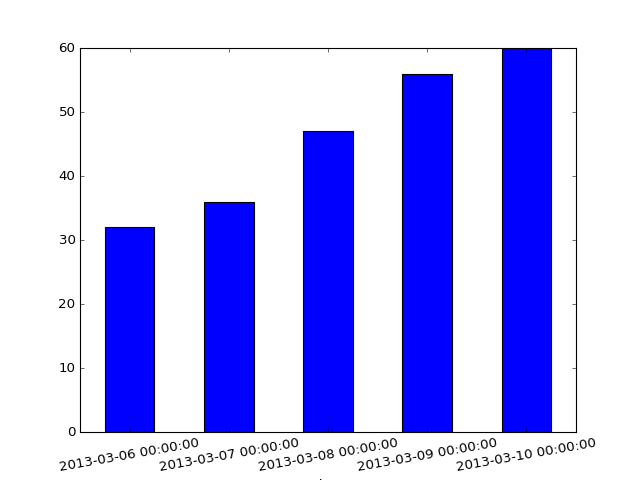

In [99]:
data.max_temp.tail().plot(kind="bar", rot=10)